In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from utils.conn_data import load_pickle
from portfolio_tools.Diagnostics import Diagnostics
from functionals.Functionals import Functionals

plt.style.use('ggplot')

In [2]:
# parameters
k = 1000
train = True
strategy_name = "etfstsm"
diag = Diagnostics()

strategy_name = f"training_{strategy_name}" if train else strategy_name

# paths
outputs_path = os.path.join(os.getcwd(), "data", "outputs")
dirs = sorted(os.listdir(os.path.join(outputs_path, strategy_name)))

print(dirs)

['% Positive Ret._means_0.25_100', '% Positive Ret._means_0.25_1000', '% Positive Ret._means_0.5_100', '% Positive Ret._means_0.5_1000', '% Positive Ret._means_0.75_100', '% Positive Ret._means_0.75_1000', '% Positive Ret._means_0.95_100', '% Positive Ret._means_0.95_1000', '% Positive Ret._means_1.0_100', '% Positive Ret._means_1.0_1000', 'AvgDD_means_0.25_100', 'AvgDD_means_0.25_1000', 'AvgDD_means_0.5_100', 'AvgDD_means_0.5_1000', 'AvgDD_means_0.75_100', 'AvgDD_means_0.75_1000', 'AvgDD_means_0.95_100', 'AvgDD_means_1.0_100', 'AvgDD_means_1.0_1000', 'MaxDD_means_0.25_100', 'MaxDD_means_0.25_1000', 'MaxDD_means_0.5_100', 'MaxDD_means_0.5_1000', 'MaxDD_means_0.75_100', 'MaxDD_means_0.75_1000', 'MaxDD_means_0.95_100', 'MaxDD_means_0.95_1000', 'MaxDD_means_1.0_100', 'MaxDD_means_1.0_1000', 'Sharpe_means_0.25_100', 'Sharpe_means_0.25_1000', 'Sharpe_means_0.5_100', 'Sharpe_means_0.5_1000', 'Sharpe_means_0.75_100', 'Sharpe_means_0.75_1000', 'Sharpe_means_0.95_100', 'Sharpe_means_0.95_1000',

In [7]:
utilities_val_train

tensor([0.0674, 0.0649, 0.0650, 0.0617, 0.0650, 0.0634, 0.0599, 0.0695, 0.0580,
        0.0644, 0.0679, 0.0750, 0.0740, 0.0731, 0.0737, 0.0738, 0.0737, 0.0798,
        0.0769, 0.0752, 0.0795, 0.0790, 0.0761, 0.0793, 0.0785, 0.0800, 0.0783,
        0.0767, 0.0762, 0.0766, 0.0832, 0.0832, 0.0860, 0.0829, 0.0821, 0.0826,
        0.0844, 0.0854, 0.0860, 0.0832, 0.0850, 0.0825, 0.0837, 0.0840, 0.0818,
        0.0831, 0.0799, 0.0776, 0.0764, 0.0789, 0.0804, 0.0806, 0.0829, 0.0855,
        0.0868, 0.0888, 0.0867, 0.0851, 0.0886, 0.0854, 0.0866, 0.0846, 0.0913,
        0.0892, 0.0875, 0.0859, 0.0844, 0.0848, 0.0854, 0.0860, 0.0862, 0.0864,
        0.0882, 0.0887, 0.0918, 0.0895, 0.0914, 0.0876, 0.0908, 0.0887, 0.0898,
        0.0887, 0.0903, 0.0912, 0.0898, 0.0897, 0.0894, 0.0925, 0.0932, 0.0963,
        0.0937, 0.0966, 0.0979, 0.0960, 0.0959, 0.1010, 0.0971, 0.0982, 0.0994,
        0.1000, 0.1033, 0.1021, 0.1013, 0.1044, 0.1043, 0.1069, 0.1059, 0.1084,
        0.1088, 0.1089, 0.1062, 0.1056, 

In [22]:
utility = dirs[0].split("_")[0]

utility

'% Positive Ret.'

Utility: % Positive Ret., Functional: means, Alpha: 0.25, Bsize: 1000


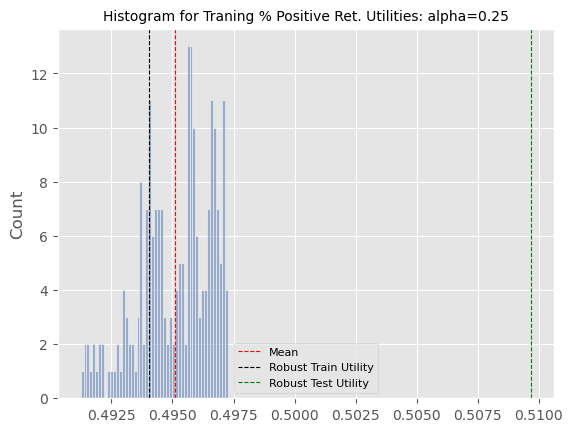

Utility: % Positive Ret., Functional: means, Alpha: 0.5, Bsize: 1000


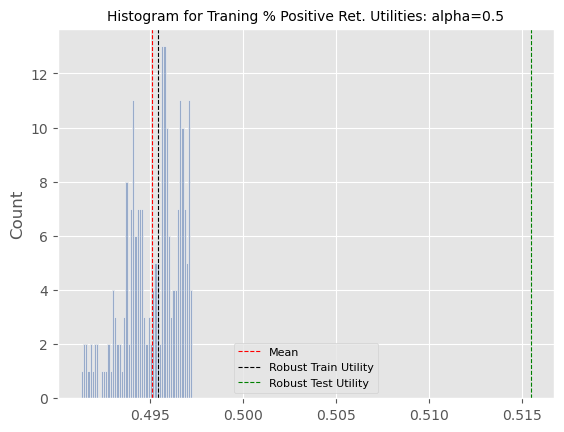

Utility: % Positive Ret., Functional: means, Alpha: 0.75, Bsize: 1000


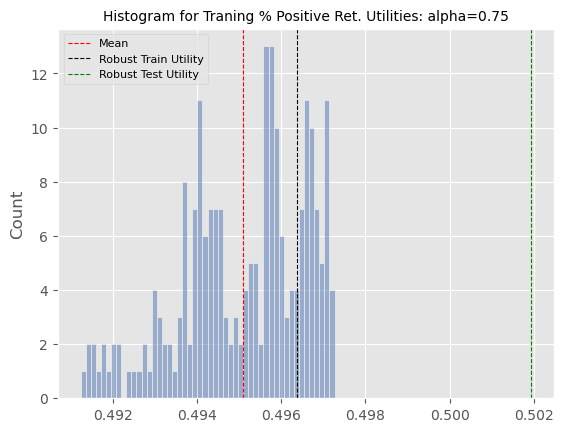

Utility: % Positive Ret., Functional: means, Alpha: 0.95, Bsize: 1000


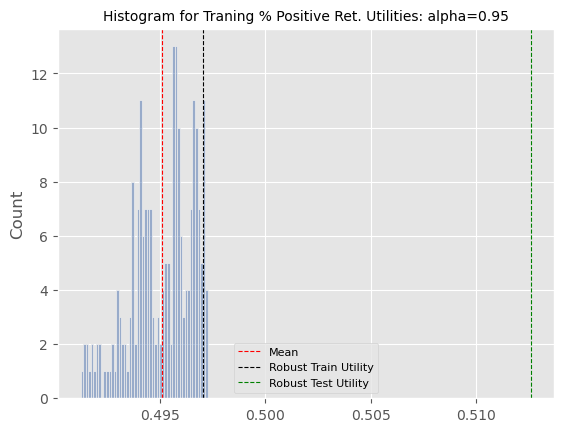

Utility: % Positive Ret., Functional: means, Alpha: 1.0, Bsize: 1000


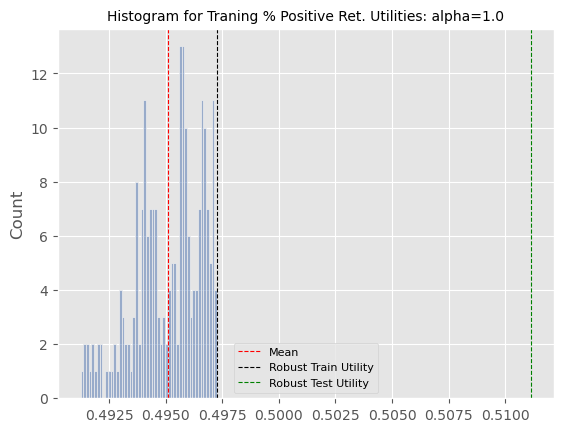

Utility: AvgDD, Functional: means, Alpha: 0.25, Bsize: 1000


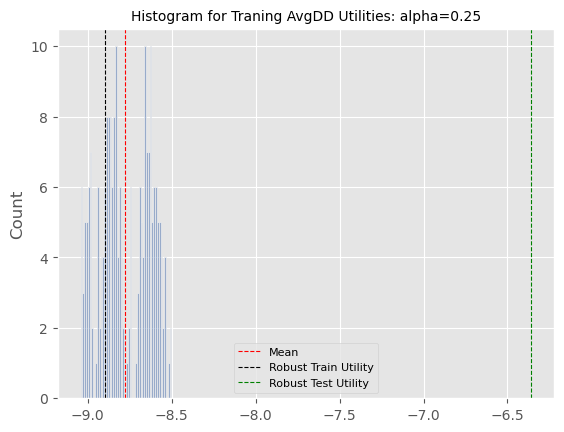

Utility: AvgDD, Functional: means, Alpha: 0.5, Bsize: 1000


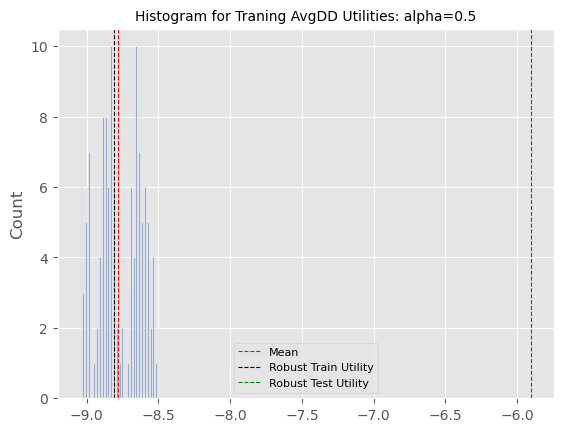

Utility: AvgDD, Functional: means, Alpha: 0.75, Bsize: 1000


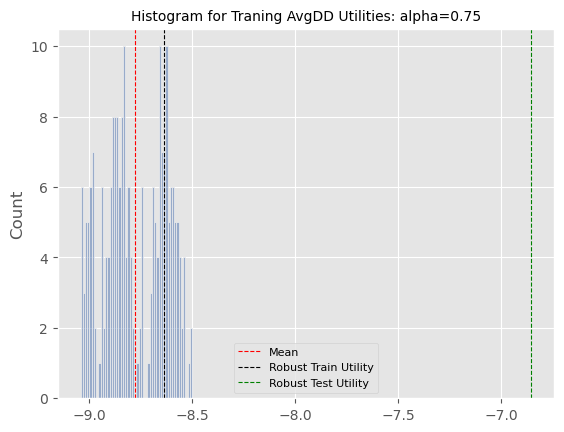

Utility: AvgDD, Functional: means, Alpha: 1.0, Bsize: 1000


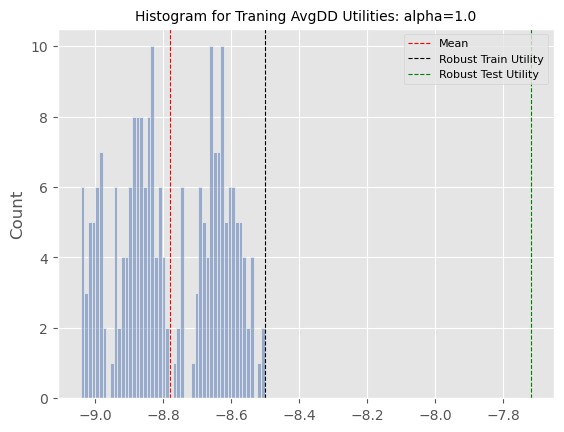

Utility: MaxDD, Functional: means, Alpha: 0.25, Bsize: 1000


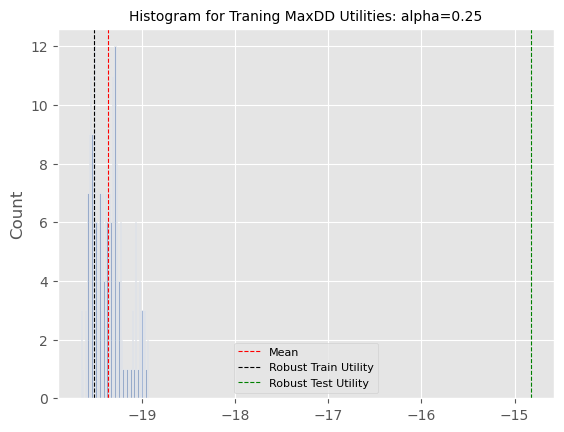

Utility: MaxDD, Functional: means, Alpha: 0.5, Bsize: 1000


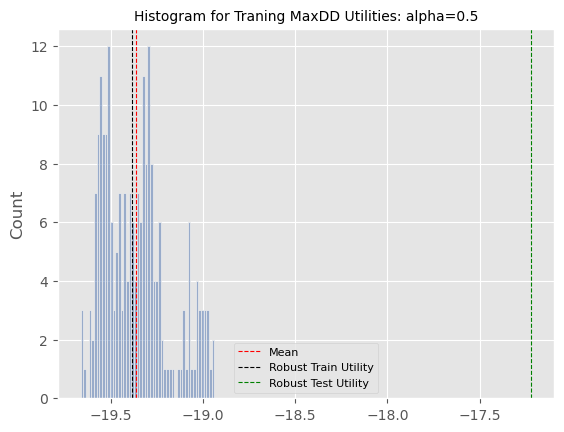

Utility: MaxDD, Functional: means, Alpha: 0.75, Bsize: 1000


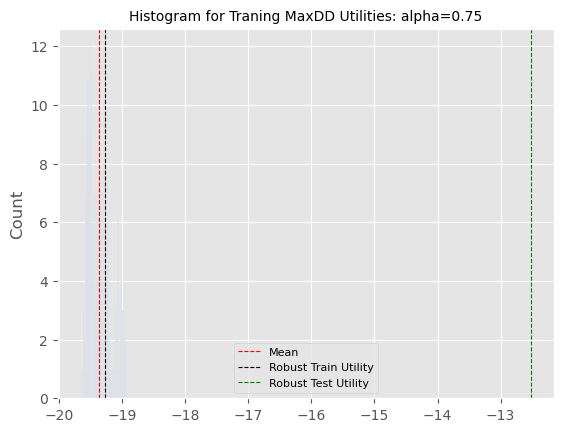

Utility: MaxDD, Functional: means, Alpha: 0.95, Bsize: 1000


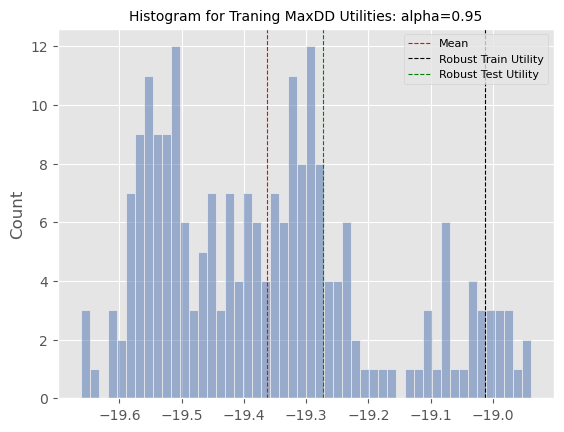

Utility: MaxDD, Functional: means, Alpha: 1.0, Bsize: 1000


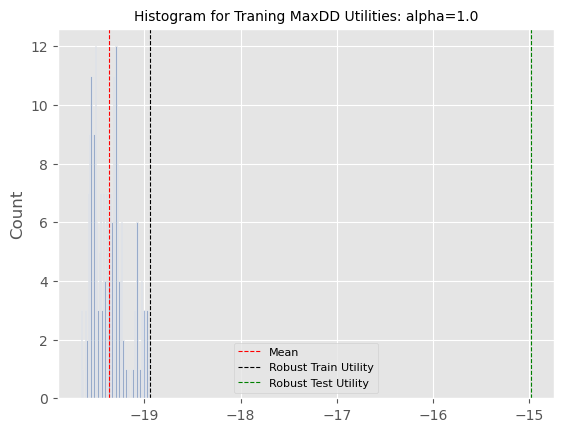

Utility: Sharpe, Functional: means, Alpha: 0.25, Bsize: 1000


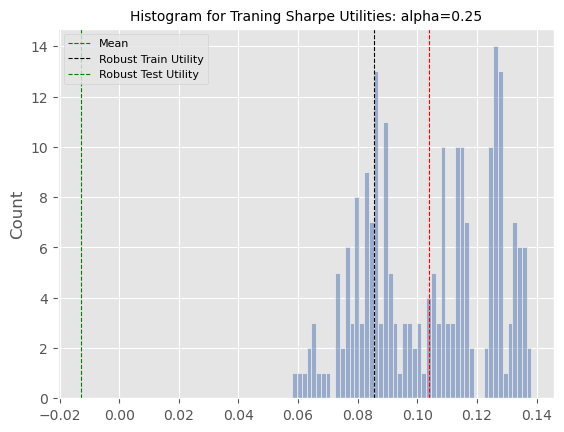

Utility: Sharpe, Functional: means, Alpha: 0.5, Bsize: 1000


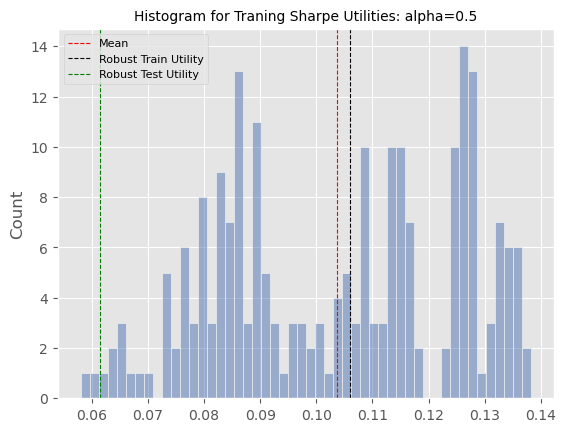

Utility: Sharpe, Functional: means, Alpha: 0.75, Bsize: 1000


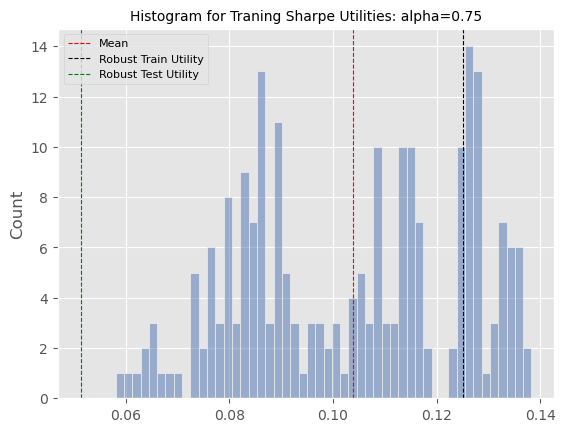

Utility: Sharpe, Functional: means, Alpha: 0.95, Bsize: 1000


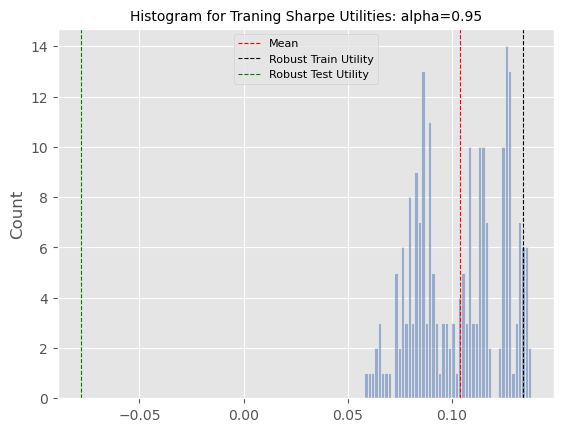

Utility: Sharpe, Functional: means, Alpha: 1.0, Bsize: 1000


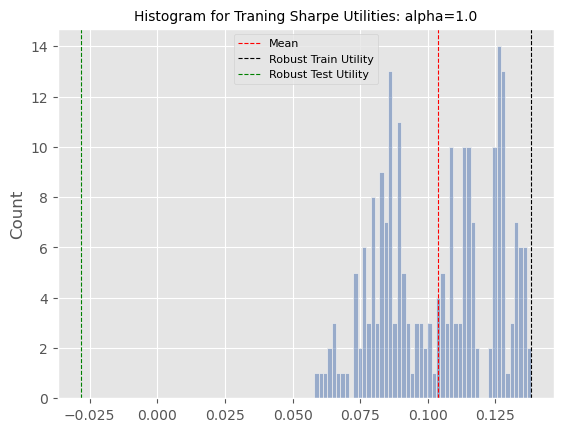

In [23]:
all_results = []
for dir in dirs:

    if k != int(dir.split("_")[-1]):
        continue

    utility = dir.split("_")[0]
    functional = dir.split("_")[1]
    alpha = dir.split("_")[2] # percentile of the empirical distribution - x such that P(X <= x) = alpha
    Bsize = dir.split("_")[3]

    functionals = Functionals(alpha=float(alpha))

    print(f"Utility: {utility}, Functional: {functional}, Alpha: {alpha}, Bsize: {Bsize}")

    # # list files in directory
    # os.listdir(os.path.join(outputs_path, strategy_name, dir))

    optmization_train = load_pickle(os.path.join(outputs_path, strategy_name, dir, "train_opt_results.pickle"))
    portfolio_train = load_pickle(os.path.join(outputs_path, strategy_name, dir, "train_portfolio_results.pickle"))
    portfolio_test = load_pickle(os.path.join(outputs_path, strategy_name, dir, "test_portfolio_results.pickle"))

    # apply functional to vector of utility vectors
    utilities_val_train = functionals.means(x=optmization_train["utilities"])

    # get the chosen utility vector
    chosen_utility_vector_train = functionals.apply_functional(x=optmization_train["utilities"], func=functional)

    # compute robust utility
    robust_utility_train = chosen_utility_vector_train.mean()

    # portfolio results
    robust_utility_test = diag.compute_metric(portoflio_returns=portfolio_test['agg_scaled_portfolio_returns'], metric_name=utility)

    # save results
    round_digits = 2 if utility != '% Positive Ret.' else 4
    results = {
        "Utility": utility,
        "Functional": functional,
        "Alpha": alpha,
        "Bsize": Bsize,
        "Train Utility Mean": np.round(utilities_val_train.mean().item(), round_digits),
        "Train Utility Std": np.round(utilities_val_train.std().item(), round_digits),
        "Robust Train Utility": np.round(robust_utility_train.mean().item(), round_digits),
        "Robust Test Utility": np.round(robust_utility_test, round_digits),
        "Generalization Gap": np.round(robust_utility_test - robust_utility_train, round_digits).item(),
    }

    results_df = pd.DataFrame([results])
    all_results.append(results_df)

    # plot
    utility_val_df = pd.DataFrame(utilities_val_train, columns=[utility])
    ax = sns.histplot(data=utility_val_df, palette="deep", bins=50)

    plt.axvline(x=utilities_val_train.mean().item(), color='red', linestyle='--', label='Mean', linewidth=0.8)
    plt.axvline(x=robust_utility_train, color='black', linestyle='--', label='Robust Train Utility', linewidth=0.8)
    plt.axvline(x=robust_utility_test, color='green', linestyle='--', label='Robust Test Utility', linewidth=0.8)
    plt.legend(fontsize=8)
    plt.title(f"Histogram for Traning {dir.split('_')[0]} Utilities: alpha={alpha}", size=10)

    plt.show()
all_results_df = pd.concat(all_results)
all_results_df["Alpha"] = ["max" if val == "1.0" else val for val in all_results_df["Alpha"]]

In [24]:
all_results_df

,Utility,Functional,Alpha,Bsize,Train Utility Mean,Train Utility Std,Robust Train Utility,Robust Test Utility,Generalization Gap
0,% Positive Ret.,means,0.25,1000,0.4951,0.0015,0.4940,0.5097,0.0157
0,% Positive Ret.,means,0.5,1000,0.4951,0.0015,0.4954,0.5155,0.0201
0,% Positive Ret.,means,0.75,1000,0.4951,0.0015,0.4964,0.5019,0.0056
0,% Positive Ret.,means,0.95,1000,0.4951,0.0015,0.4970,0.5126,0.0156
0,% Positive Ret.,means,max,1000,0.4951,0.0015,0.4973,0.5112,0.0139
0,AvgDD,means,0.25,1000,-8.7800,0.1500,-8.9000,-6.3600,2.5400
0,AvgDD,means,0.5,1000,-8.7800,0.1500,-8.8100,-5.9000,2.9100
0,AvgDD,means,0.75,1000,-8.7800,0.1500,-8.6400,-6.8500,1.7900
0,AvgDD,means,max,1000,-8.7800,0.1500,-8.5000,-7.7200,0.7900
0,MaxDD,means,0.25,1000,-19.3600,0.1800,-19.5200,-14.8200,4.7000


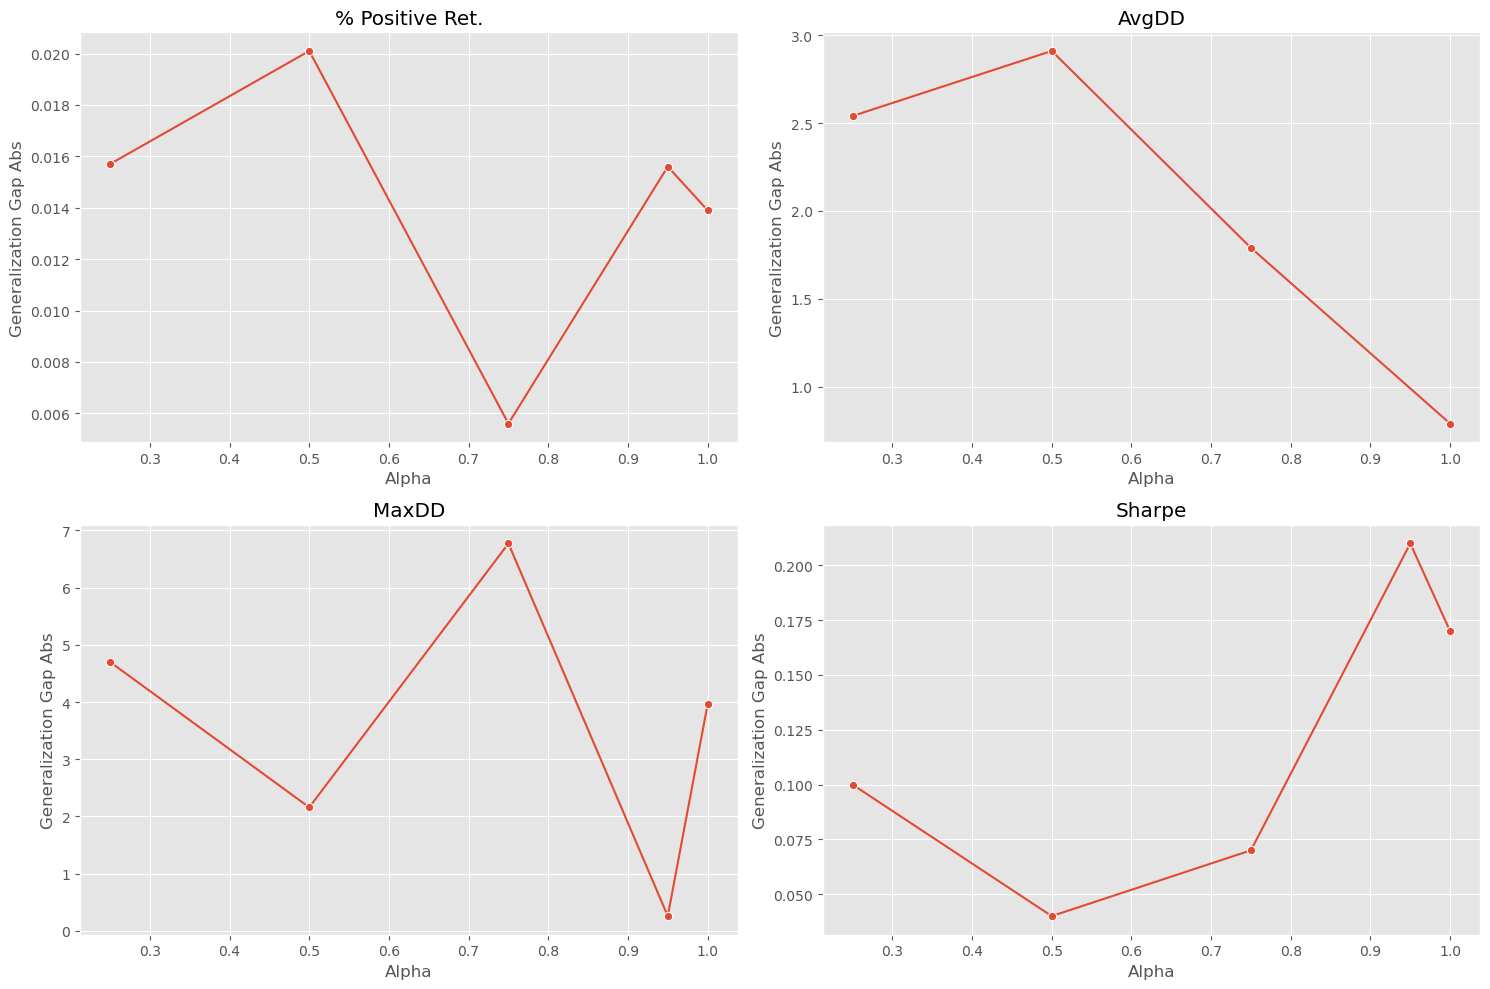

In [25]:
df_filtered = all_results_df.copy()
df_filtered.loc[df_filtered['Alpha'] == 'max', 'Alpha'] = 1.0
df_filtered['Alpha'] = pd.to_numeric(df_filtered['Alpha'])
df_filtered["Generalization Gap Abs"] = df_filtered["Generalization Gap"].abs()

utilities = df_filtered['Utility'].unique()

# Setup the matplotlib figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Iterate over utilities and plot on a separate subplot
for i, utility in enumerate(utilities):
    sns.lineplot(
        data=df_filtered[df_filtered['Utility'] == utility],
        x='Alpha', y='Generalization Gap Abs',
        ax=axes[i], marker='o'
    )
    axes[i].set_title(f'{utility}')
    axes[i].set_xlabel('Alpha')
    axes[i].set_ylabel('Generalization Gap Abs')

# Adjust layout for better fit
plt.tight_layout()
plt.show()